# Project Business Statistics: E-news Express

## Define Problem Statement and Objectives

### Problem Statement
E-news Express, an online news portal, is facing challenges in attracting new subscribers, suspecting that their current webpage design may not be engaging enough to convert visitors into subscribers. To address this, the company has introduced a new landing page and needs to evaluate its effectiveness in comparison to the existing page. The primary focus is to understand if the new page design influences user engagement and conversion rates.

### Objectives
**Assess User Engagement**
- Determine if users spend more time on the new landing page compared to the existing one. This involves comparing the average time spent by users on each page.
  
**Evaluate Conversion Rates**
- Compare the conversion rates (the proportion of users who subscribe) between the new and the existing landing pages. The goal is to establish whether the new page leads to a higher conversion rate.
  
**Analyze the Impact of Language Preference:**
- Investigate if the likelihood of a user subscribing (converted status) is influenced by their preferred language. This will help understand if the content’s language tailoring impacts user conversion.
  
**Examine Time Spent by Language**
- Analyze if the time spent on the new page is consistent across users with different language preferences. This will indicate whether the page is equally engaging for all language groups.

To achieve these objectives, a statistical analysis at a 5% significance level will be conducted on the data collected from an A/B testing experiment. This experiment involved 100 users, randomly assigned to either the control group (existing page) or the treatment group (new page), to objectively measure the performance of the new landing page against the existing one.

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [2]:
# Load dataset into Pandas datafram
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
# Display the first and last few rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
# Check the shape of the dataset
print("The shape of the dataset is:", df.shape)

The shape of the dataset is: (100, 6)


In [6]:
# Get statistical summary for the variables
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [7]:
# Check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [8]:
# Check for duplicate values
df.duplicated().sum()

0

### Univariate Analysis

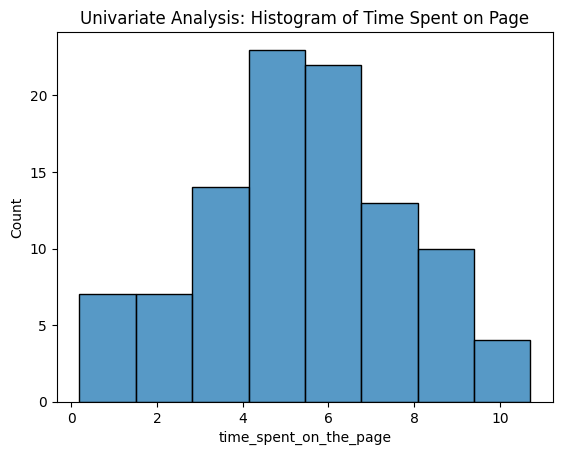

In [9]:
sns.histplot(data = df, x = 'time_spent_on_the_page')
plt.title('Univariate Analysis: Histogram of Time Spent on Page')
plt.show()

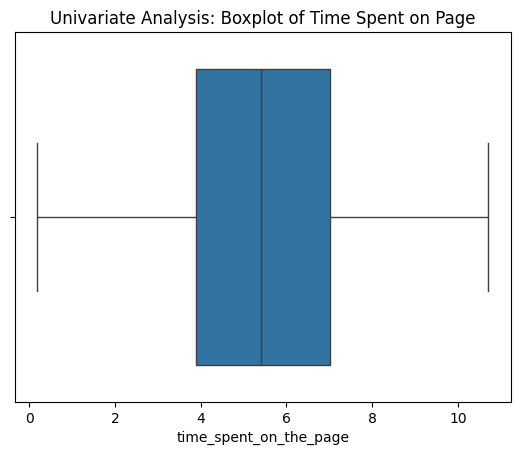

In [10]:
sns.boxplot(data = df, x = 'time_spent_on_the_page')
plt.title('Univariate Analysis: Boxplot of Time Spent on Page')
plt.show()

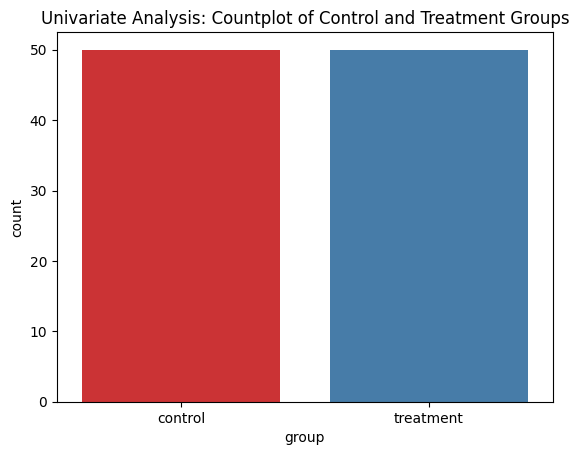

In [30]:
sns.countplot(data=df, x='group', hue='group', palette='Set1', dodge=False)
plt.legend([], [], frameon=False) 
plt.title('Univariate Analysis: Countplot of Control and Treatment Groups')
plt.show()

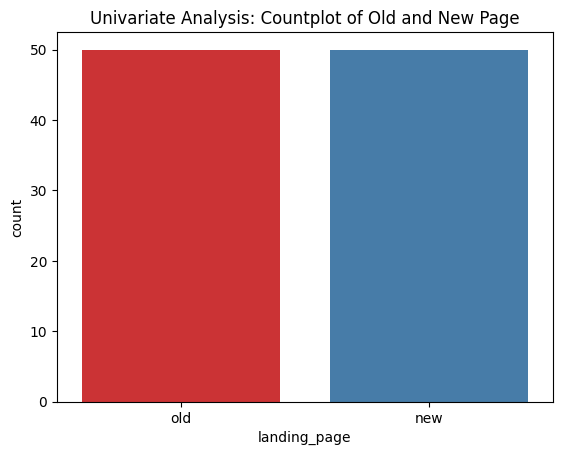

In [35]:
df['landing_page'].value_counts()
sns.countplot(data=df,x='landing_page', hue='landing_page', palette='Set1', dodge=False)
plt.legend([], [], frameon=False) 
plt.title('Univariate Analysis: Countplot of Old and New Page')
plt.show()

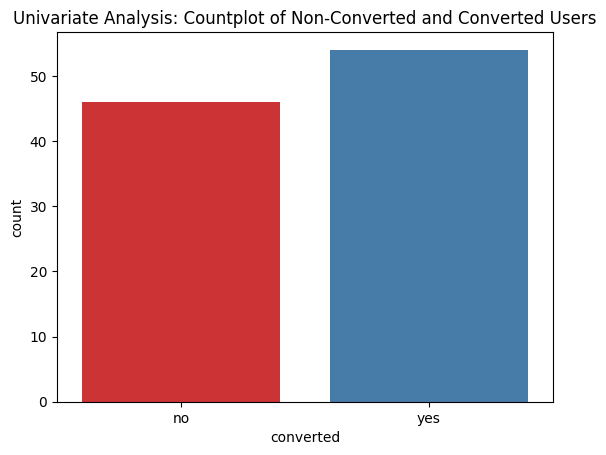

In [36]:
df['converted'].value_counts()
sns.countplot(data=df,x='converted', hue='converted', palette='Set1', dodge=False)
plt.legend([], [], frameon=False) 
plt.title('Univariate Analysis: Countplot of Non-Converted and Converted Users')
plt.show()

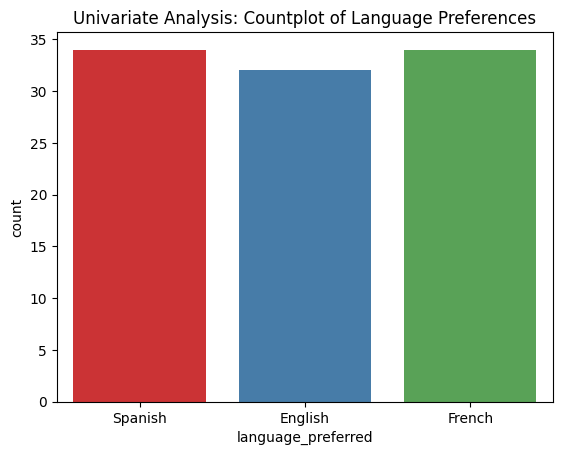

In [38]:
df['language_preferred'].value_counts()
sns.countplot(data=df,x='language_preferred', hue='language_preferred', palette='Set1', dodge=False)
plt.legend([], [], frameon=False) 
plt.title('Univariate Analysis: Countplot of Language Preferences')
plt.show()

### Bivariate Analysis

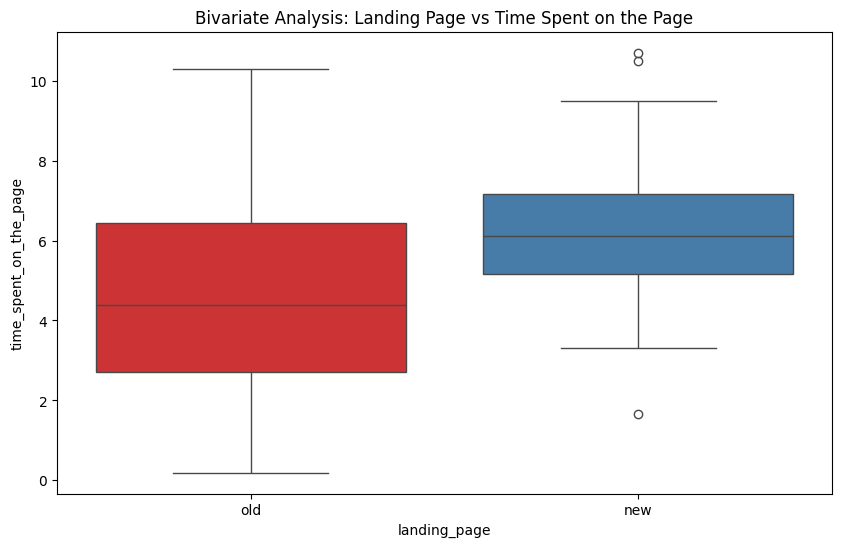

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='landing_page', palette='Set1')
plt.title('Bivariate Analysis: Landing Page vs Time Spent on the Page')
plt.show()

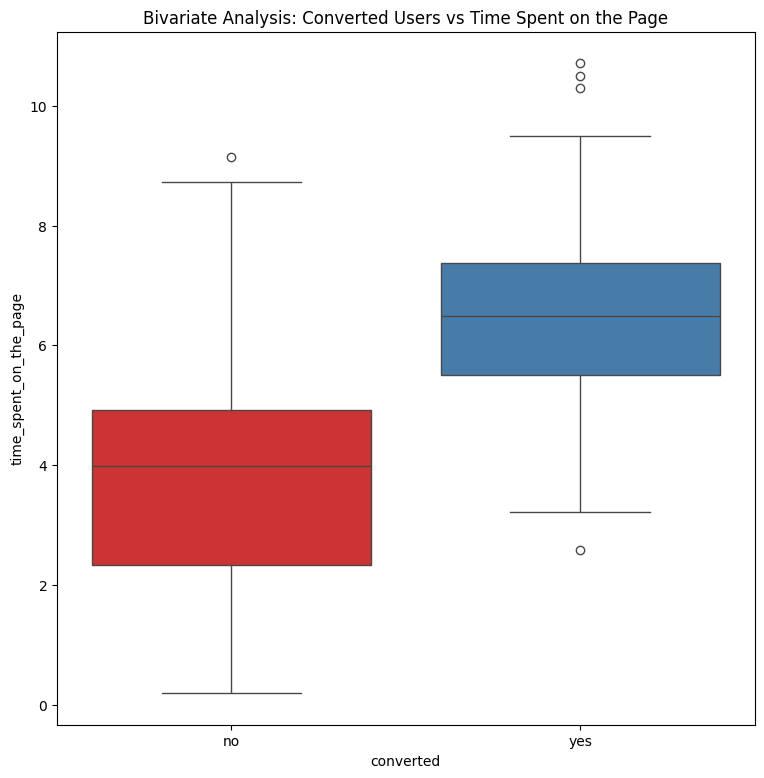

In [42]:
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page', hue='converted', palette='Set1')
plt.title('Bivariate Analysis: Converted Users vs Time Spent on the Page')
plt.show()

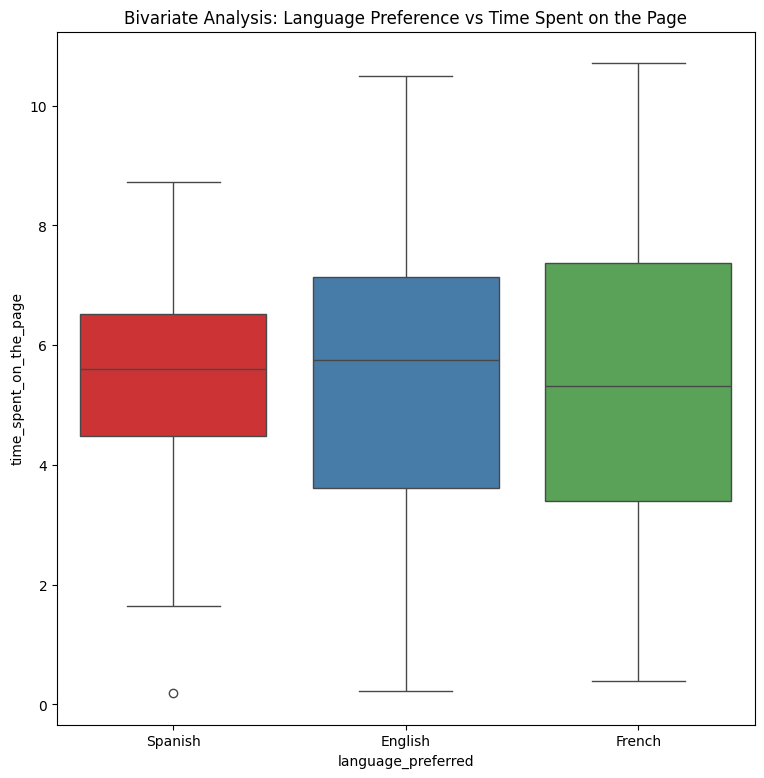

In [43]:
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page', hue='language_preferred', palette='Set1')
plt.title('Bivariate Analysis: Language Preference vs Time Spent on the Page')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

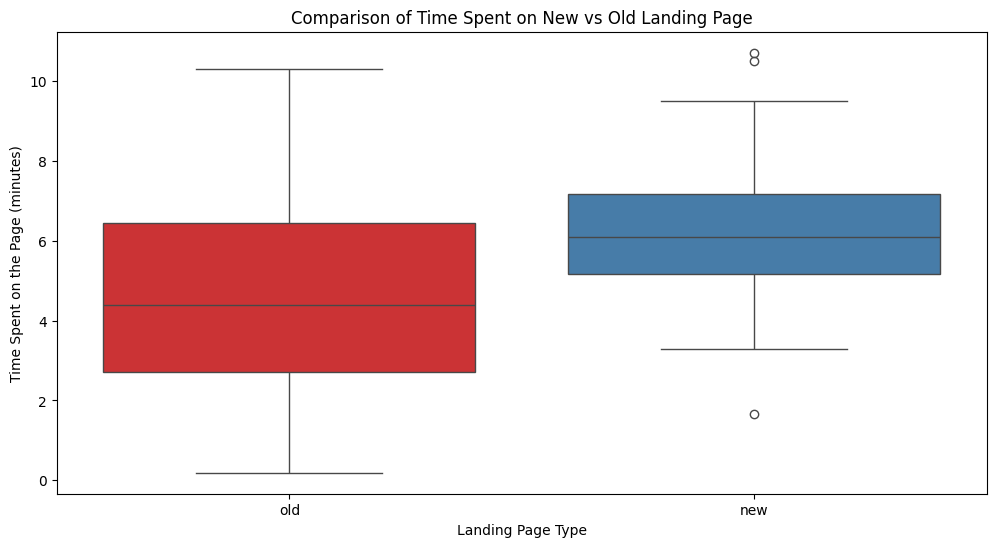

In [45]:
# Creating a boxplot to compare time spent on the new vs old landing page
plt.figure(figsize=(12, 6))
sns.boxplot(x='landing_page', y='time_spent_on_the_page', hue='landing_page', palette='Set1', data=df)

# Adding title and labels
plt.title('Comparison of Time Spent on New vs Old Landing Page')
plt.xlabel('Landing Page Type')
plt.ylabel('Time Spent on the Page (minutes)')

plt.show()

From this visual analysis, it appears that users do spend more time on the new landing page compared to the existing (old) landing page. This is evidenced by the higher median and greater spread of time spent on the new page.

### Step 1: Define the null and alternate hypotheses

$H_0:$ The mean time spent on the new landing page is less than or equal to the mean time spent on the existing landing page.

$H_a:$ The mean time spent on the new landing page is greater than the mean time spent on the existing landing page.



### Step 2: Select Appropriate test

A one-tailed t-test (independent samples) can be used to compare the means of two independent groups when the data is continuous and normally distributed.

### Step 3: Decide the significance level

α = 0.05.

### Step 4: Collect and prepare data

In [46]:
# Create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# Create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


### Step 5: Calculate the p-value

In [47]:
from scipy.stats import ttest_ind 

test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [48]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value (0.000139) is significantly less than the significance level of 0.05, the null hypothesis is **rejected**. This means there is statistically significant evidence at the 5% level of significance to conclude that **users spend more time on the new landing page** than on the existing landing page. This suggests that the new landing page is potentially **more engaging or interesting to users** compared to the old one, leading them to spend more time on it. This could be due to a variety of factors such as better design, more relevant content, or improved user experience. The results support the initiative of E-news Express to **utilize the new landing page for enhancing user engagement and potentially increasing subscriber rates.**

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

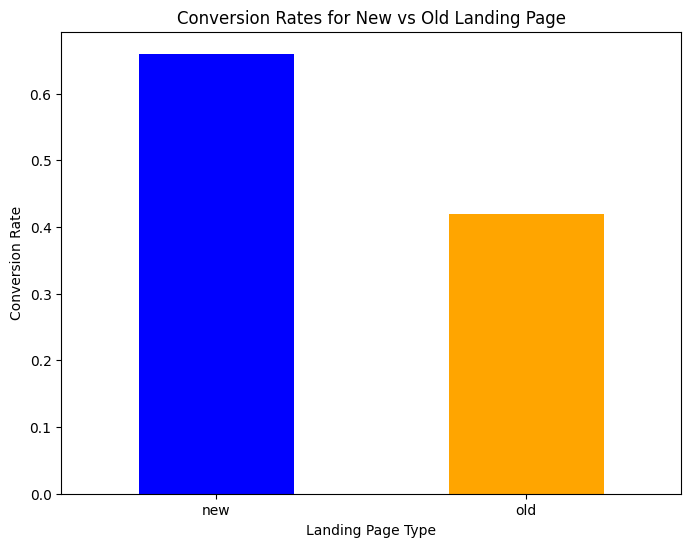

In [49]:
# Converting the 'converted' column to numeric for easier analysis (1 for yes, 0 for no)
df['converted_numeric'] = df['converted'].apply(lambda x: 1 if x == 'yes' else 0)

# Calculating conversion rates
conversion_rates = df.groupby('landing_page')['converted_numeric'].mean()

# Plotting
plt.figure(figsize=(8, 6))
conversion_rates.plot(kind='bar', color=['blue', 'orange'])
plt.title('Conversion Rates for New vs Old Landing Page')
plt.xlabel('Landing Page Type')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)  # Rotates X-axis labels for readability
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0:$ The conversion rate for the new page is less than or equal to that of the old page.

$H_a:$ The conversion rate for the new page is greater than that of the old page.


### Step 2: Select Appropriate test

A two-proportion z-test can be used to compare the proportions of two independent groups.

### Step 3: Decide the significance level

α = 0.05.

### Step 4: Collect and prepare data

In [50]:
# Calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# Calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] 

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [51]:
from statsmodels.stats.proportion import proportions_ztest   

# Calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')


print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [52]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value (0.008) is less than the significance level of 0.05, the null hypothesis is **rejected**. This suggests that there is statistically significant evidence to support the claim that the **new landing page has a higher conversion rate** compared to the old landing page. E-news' decision to implement the new landing page is justified in terms of improving conversion rates and can consider it a **strategy to increasse subscriber numbers** based on these results.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

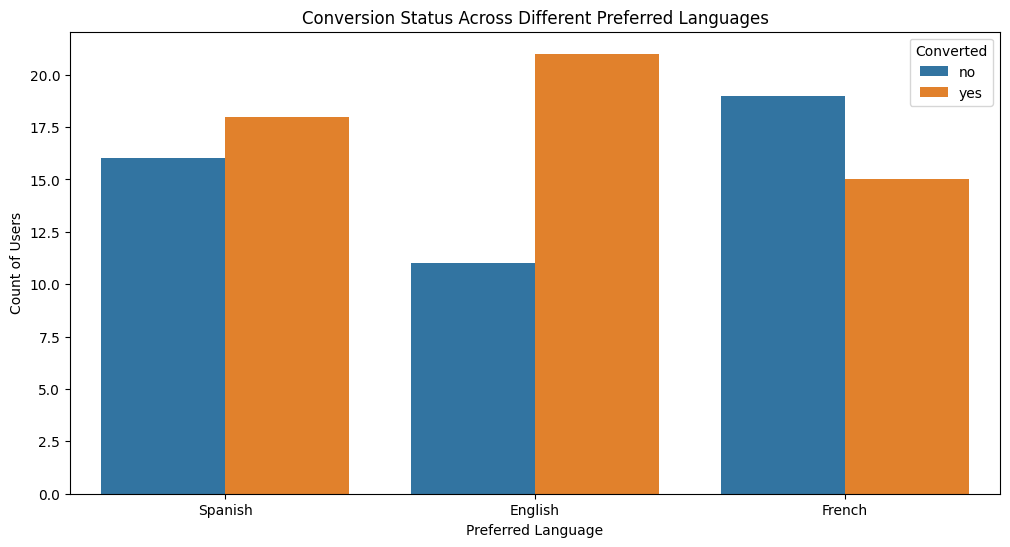

In [53]:
# Creating a bar plot for visual analysis
plt.figure(figsize=(12, 6))

# Plotting the count of converted and not converted users for each preferred language
sns.countplot(x='language_preferred', hue='converted', data=df)

# Adding title and labels
plt.title('Conversion Status Across Different Preferred Languages')
plt.xlabel('Preferred Language')
plt.ylabel('Count of Users')
plt.legend(title='Converted')

plt.show()

While there are differences, they don't appear to be extremely significant at a glance. This suggests that while language preference might influence user engagement to some extent, it may not be the primary factor driving conversion to subscribers.

### Step 1: Define the null and alternate hypotheses

$H_0:$ The converted status is independent of the preferred language.

$H_a:$ The converted status depends on the preferred language.


### Step 2: Select Appropriate test

A chi-square test of independence can be used to determine if there is a significant relationship between two categorical variables.

### Step 3: Decide the significance level

α = 0.05.

### Step 4: Collect and prepare data

In [57]:
# Create a contingency table
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])

### Step 5: Calculate the p-value

In [58]:
from scipy.stats import chi2_contingency

# Perform the Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the p-value
chi2, p_value, dof, expected, contingency_table
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [59]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

The p-value (0.213) is greater than the significance level of 0.05. This means we do not have sufficient evidence to reject the null hypothesis. The null hypothesis for a chi-square test of independence states that there is **no association between the two variables**. Therefore, based on this data, we conclude that there is no significant association between conversion status (whether a user becomes a subscriber) and the preferred language of the user. This result suggests that the likelihood of a user subscribing to the news portal **does not significantly depend on their language preference.** This information can be valuable for E-news Express in strategizing their content and marketing efforts across different language segments.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

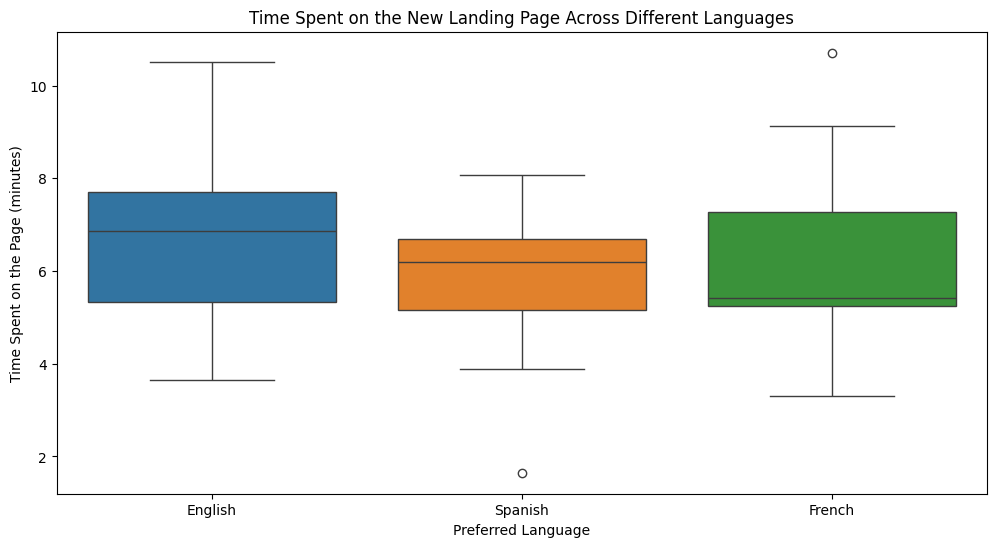

In [62]:
# Filtering data for only the new landing page
new_page_data = df[df['landing_page'] == 'new']

# Creating a boxplot for time spent on the new page across different languages
plt.figure(figsize=(12, 6))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', hue = 'language_preferred', data=new_page_data)

# Adding title and labels
plt.title('Time Spent on the New Landing Page Across Different Languages')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent on the Page (minutes)')

plt.show()

The boxplot visually represents the distribution of time spent on the new landing page across different preferred languages. The time spent on the new page does not seem to be exactly the same across different language users. There are variations in both the median time spent and the distribution range. However, these differences are not extremely pronounced.

### Step 1: Define the null and alternate hypotheses

$H_0:$ The mean time spent on the new page is the same across different language users.

$H_a:$ There are differences in the mean time spent on the new page across different language users.


### Step 2: Select Appropriate test

One-way ANOVA can be used to compare the means of more than two independent groups.

### Step 3: Decide the significance level

α = 0.05.

### Step 4: Collect and prepare data

In [63]:
# Creating separate groups for each language
time_english = new_page_data[new_page_data['language_preferred'] == 'English']['time_spent_on_the_page']
time_french = new_page_data[new_page_data['language_preferred'] == 'French']['time_spent_on_the_page']
time_spanish = new_page_data[new_page_data['language_preferred'] == 'Spanish']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [64]:
from scipy.stats import f_oneway

# Conducting the ANOVA test
anova_result = f_oneway(time_english, time_french, time_spanish)

p_value = anova_result.pvalue
print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [65]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

The p-value (0.432) is greater than the significance level of 0.05. This indicates that we do not have sufficient evidence to reject the null hypothesis. This suggests that there are **no statistically significant differences** in the time spent on the new landing page among users who prefer different languages. This result implies that the time users spend on the new landing page of E-news Express **does not significantly vary based on their language preference**. This could indicate that the new page is **equally engaging** to users **regardless of their preferred language**, which is a **positive indicator** for the universal appeal and effectiveness of the page's design and content.

## Conclusion and Business Recommendations

### Conclusion
Based on the comprehensive analysis of the E-news Express data, the following conclusions can be drawn:
1. **Time Spent on Landing Pages:** Users spend more time on the new landing page compared to the existing one. This was indicated both visually and statistically, suggesting that the new page is more engaging or effectively holds users' attention longer.
2. **Conversion Rate:** There is a significant difference in the conversion rate (users who become subscribers) when comparing the new and old landing pages. This implies that the new page may be more engaging and in turn translates into a higher conversion rate.
3. **Language Preference and Conversion:** The analysis revealed no significant association between users' language preference and their conversion status. This suggests that language, in itself, does not play a major role in influencing whether a user becomes a subscriber.
4. **Time Spent and Language Preference:** There were no significant differences in the time spent on the new page among users with different language preferences, indicating that the new page appeals equally across different language groups.

### Business Recommendations
1. **Further Investigate Conversion Strategies:** With the new landing page proving to be effective in both engaging users longer and converting them at a higher rate, it should be the primary interface for new users. Focus on maintaining and enhancing the features that make this page successful.
2. **Replicate Successful Strategies:** Apply the successful elements of the new landing page to other parts of the website and to other digital marketing materials to enhance overall user engagement and conversion rates across the platform.
3. **Language Neutral Approach:** Since language preference does not significantly impact conversion rates or time spent on the page, a language-neutral approach in design and content can be maintained. However, ensuring high-quality translations and language-specific content should continue to cater to a diverse user base.
4. **A/B Testing for Conversion Enhancement:** Implement further A/B testing focusing on elements that could increase conversion rates. This could include experimenting with call-to-action placements, subscription offers, or personalized content.
5. **User Experience and Content Quality:** Prioritize user experience and content quality, as these factors likely contribute to the increased time spent on the new landing page. Investigate which aspects of the new design users find most appealing and consider how these can be leveraged to improve conversion rates.
6. **Segmented Marketing Strategies:** Although language preference doesn't significantly impact conversion, different marketing strategies may still be effective for different language groups. Consider cultural nuances and preferences in marketing campaigns.

By focusing on these areas, E-news Express can not only maintain user engagement but also potentially improve conversion rates, leading to a successful expansion of its subscriber base.




___